In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras import models,layers
import pandas as pd
#from sklearn.metrics import confusion_matrix, classification_report

In [2]:
tf.test.is_gpu_available()

True

In [3]:
path=r"G:\dataset\cifar-10"

In [4]:
lable=pd.read_csv(path+"\\"+"trainLabels.csv")
keys=lable.keys()

In [5]:
categoris=['cat',
 'horse',
 'automobile',
 'ship',
 'deer',
 'bird',
 'frog',
 'truck',
 'airplane',
 'dog']

In [6]:
lableId=[]
for i in range(len(lable)):
    for j in range(10):
        if lable[keys[1]][i]==categoris[j]:
            lableId.append(j)

In [7]:
data=[]
for i in lable['id']:
    temp=cv2.imread(path+"\\train\\"+str(i)+".png")
    data.append(temp)
data=np.array(data)
data.shape

(50000, 32, 32, 3)

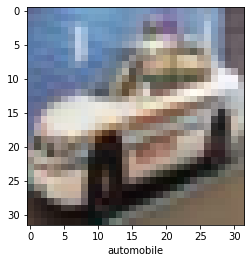

In [8]:
def checkData(i):
    plt.imshow(data[i])
    plt.xlabel(categoris[lableId[i]])
checkData(1410)

In [9]:
dataSplitSize=5
splitedData=np.array_split(data,dataSplitSize)
splitedLable=np.array_split(lableId,dataSplitSize)
print(len(splitedData))
trainData=np.concatenate(splitedData[0:-1])
trainLabels=np.concatenate(splitedLable[0:-1])
print(trainData.shape)
testData=splitedData[-1]
testLabels=splitedLable[-1]
print(testData.shape)

5
(40000, 32, 32, 3)
(10000, 32, 32, 3)


In [10]:
trainData=np.array(trainData)/255
trainLabels=np.array(trainLabels,int)
trainLabels.reshape(len(trainLabels),1)

array([[6],
       [7],
       [7],
       ...,
       [6],
       [5],
       [3]])

In [11]:
input_shape=(32,32,3)
output_size=10
hidden1=400
hidden2=100

In [13]:
model = models.Sequential()

#filter
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),kernel_initializer='he_uniform',activation='relu',input_shape=input_shape))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),kernel_initializer='he_uniform',activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=64,kernel_size=(3,3),kernel_initializer='he_uniform',activation='relu'))
model.add(layers.Conv2D(filters=64,kernel_size=(3,3),kernel_initializer='he_uniform',activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
#ann
model.add(layers.Flatten())
model.add(layers.Dense(hidden1, activation='relu'))
model.add(layers.Dense(hidden2, activation='relu'))
model.add(layers.Dense(output_size, activation='softmax'))
model.summary()
# model = models.Sequential()

# model.add(layers.Conv2D(32, (3,3), kernel_initializer='he_uniform', padding='same', input_shape=(32,32,3)))
# model.add(layers.Activation('relu'))
# model.add(layers.BatchNormalization())

# model.add(layers.Conv2D(64, (3,3), kernel_initializer='he_uniform', padding='same'))
# model.add(layers.Activation('relu'))
# model.add(layers.BatchNormalization())
# model.add(layers.MaxPooling2D((2,2)))

# model.add(layers.Conv2D(128, (3,3), kernel_initializer='he_uniform', padding='same'))
# model.add(layers.Activation('relu'))
# model.add(layers.BatchNormalization())
# model.add(layers.MaxPooling2D((2,2)))

# model.add(layers.Conv2D(128, (3,3), kernel_initializer='he_uniform', padding='same'))
# model.add(layers.Activation('relu'))
# model.add(layers.BatchNormalization())
# model.add(layers.MaxPooling2D((2,2)))

# model.add(layers.Flatten())
# model.add(layers.Dense(32))
# model.add(layers.Activation('relu'))
# model.add(layers.Dense(10))
# model.add(layers.Activation('softmax'))


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)             

In [14]:
model.compile(loss= tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'], optimizer='adam')
model.fit(trainData, trainLabels, batch_size=128, epochs=15, verbose=2)
model.save(path+"\\trained.h5")

Train on 40000 samples
Epoch 1/15
40000/40000 - 56s - loss: 1.5714 - acc: 0.4240
Epoch 2/15
40000/40000 - 41s - loss: 1.1348 - acc: 0.5971
Epoch 3/15
40000/40000 - 41s - loss: 0.9367 - acc: 0.6748
Epoch 4/15
40000/40000 - 41s - loss: 0.7820 - acc: 0.7270
Epoch 5/15
40000/40000 - 40s - loss: 0.6690 - acc: 0.7646
Epoch 6/15
40000/40000 - 42s - loss: 0.5538 - acc: 0.8048
Epoch 7/15
40000/40000 - 43s - loss: 0.4509 - acc: 0.8400
Epoch 8/15
40000/40000 - 43s - loss: 0.3550 - acc: 0.8746
Epoch 9/15
40000/40000 - 43s - loss: 0.2747 - acc: 0.9029
Epoch 10/15
40000/40000 - 42s - loss: 0.2019 - acc: 0.9283
Epoch 11/15
40000/40000 - 42s - loss: 0.1727 - acc: 0.9399
Epoch 12/15
40000/40000 - 42s - loss: 0.1318 - acc: 0.9535
Epoch 13/15
40000/40000 - 40s - loss: 0.1163 - acc: 0.9603
Epoch 14/15
40000/40000 - 40s - loss: 0.0924 - acc: 0.9688
Epoch 15/15
40000/40000 - 40s - loss: 0.0890 - acc: 0.9705


In [15]:
model.evaluate(trainData, trainLabels)

40000/40000 [==============================] - 20s 491us/sample - loss: 0.0648 - acc: 0.9791


[0.06477755846111104, 0.97907495]

In [16]:
model.evaluate(testData, testLabels)

10000/10000 [==============================] - 5s 500us/sample - loss: 14.9425 - acc: 0.6711


[14.942464125061035, 0.67109996]